In [ ]:
################################ Best RF models per type and model comparison ################################

In [ ]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')


In [2]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())

Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))

Original dataset shape Counter({0: 23364, 1: 6636})


In [8]:
################# Without any resampling technique #################

In [9]:
# Automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels = cross_val_predict(search, input_cols, target_col, cv=cv_outer, n_jobs=-1)

# Generate the classification report
report = classification_report(target_col, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     23364
           1       0.64      0.37      0.47      6636

    accuracy                           0.81     30000
   macro avg       0.74      0.65      0.68     30000
weighted avg       0.79      0.81      0.79     30000



In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate recall, accuracy, and precision on the test set
recall = recall_score(target_col, predicted_labels)
print("Recall:", "{:.4f}".format(recall))

accuracy = accuracy_score(target_col, predicted_labels)
print("Accuracy:", "{:.4f}".format(accuracy))

precision = precision_score(target_col, predicted_labels)
print("Precision:", "{:.4f}".format(precision))

f1 = f1_score(target_col, predicted_labels)
print("F1 Score:", "{:.4f}".format(f1))

Recall: 0.3672
Accuracy: 0.8138
Precision: 0.6375
F1 Score: 0.4660


In [19]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_col, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21978  1386]
 [ 4199  2437]]


In [63]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np

# configure the cross-validation procedure for the inner loop
cv_inner_without = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_without = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_without, refit=True)
# configure the cross-validation procedure for the outer loop
cv_outer_without = KFold(n_splits=10, shuffle=True, random_state=1)


# Execute the nested cross-validation
outer_f1_scores_without = []
for train_ix, test_ix in cv_outer_without.split(input_cols):
    # split data
    X_train_without, X_test_without = np.array(input_cols)[train_ix], np.array(input_cols)[test_ix]
    y_train_without, y_test_without = np.array(target_col)[train_ix], np.array(target_col)[test_ix]
    
    # fit model
    search_without.fit(X_train_without, y_train_without)
    
    # predict
    y_pred_without = search_without.predict(X_test_without)
    
    # calculate F1-score
    f1_without = f1_score(y_test_without, y_pred_without)
    
    # store result
    outer_f1_scores_without.append(f1_without)

# print the outer cross-validation F1-scores
print("Outer CV F1-scores:", outer_f1_scores_without)

Outer CV F1-scores: [0.47725162488393685, 0.43227091633466136, 0.45410628019323673, 0.4907749077490775, 0.45075757575757575, 0.4541984732824427, 0.4688372093023256, 0.4881889763779528, 0.4626262626262626, 0.478584729981378]


In [ ]:
#### Simple model

In [34]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_cols, target_col, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_valid.shape)
print(y_train.shape)
print(y_test.shape)

(18000, 23)
(6000, 23)
(6000, 23)
(6000,)
(18000,)
(6000,)


In [35]:
# 100 Bags without any resampling technique
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_100 = BaggingClassifier(base_classifier, n_estimators=100, random_state=0)

# Train the BaggingClassifier
bagging_classifier_100.fit(X_train, y_train)

# Predict using the BaggingClassifier
y_pred_100 = bagging_classifier_100.predict(X_valid)

# Calculate the f1-score and print classification report
bagging_f1_100 = f1_score(y_valid, y_pred_100)
print("F1 Score:", "{:.4f}".format(bagging_f1_100))

print("Classification Report:")
print(classification_report(y_valid, y_pred_100))

F1 Score: 0.4685
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.68      0.36      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [36]:
# Predict using the BaggingClassifier on the test set
y_pred_100_test = bagging_classifier_100.predict(X_test)

# Calculate the F1-score and print classification report for the test set
bagging_f1_100_test = f1_score(y_test, y_pred_100_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_100_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_100_test))

F1 Score: 0.4731
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [41]:
## Code for the F1 scores to see the difference between the models is significant or not.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
import numpy as np
from scipy.stats import ttest_ind

# Function to calculate F1 scores for a random forest model
def calculate_f1_scores(model, X, y):
    f1_scores = np.zeros((len(model.estimators_)))
    for i, tree in enumerate(model.estimators_):
        y_pred = tree.predict(X)
        f1_scores[i] = f1_score(y, y_pred)
    return f1_scores

In [42]:
## F1 score array for the model without resampling techniques
f1_scores_without_resampling = calculate_f1_scores(bagging_classifier_100, X_test, y_test)

c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier 

In [43]:
print(f1_scores_without_resampling)

[0.84297521 0.84940778 0.84483176 0.83590876 0.84814725 0.83610568
 0.84650937 0.85680077 0.82883767 0.82594702 0.83128985 0.8465813
 0.8543923  0.85488506 0.84454191 0.82721223 0.83908605 0.84141291
 0.86744131 0.83288476 0.84031159 0.86473546 0.84637822 0.84944148
 0.83345597 0.84365924 0.84158901 0.84820563 0.85128947 0.85272815
 0.83288476 0.83394473 0.83015174 0.83483777 0.85009671 0.84277035
 0.85088985 0.83104799 0.84305151 0.83263906 0.84725248 0.83157118
 0.83251714 0.84338521 0.83825323 0.83566691 0.84632192 0.83853659
 0.83651493 0.85480769 0.84550085 0.83230731 0.84020493 0.83423512
 0.82716049 0.84671533 0.84443364 0.85287744 0.84509091 0.85050798
 0.83606959 0.84289883 0.82265644 0.83374203 0.8407209  0.85175333
 0.85009671 0.83648881 0.83557293 0.84745763 0.84714459 0.84463895
 0.83537482 0.83733464 0.84213099 0.85079672 0.85389453 0.85211946
 0.84123511 0.83395016 0.84474775 0.85569986 0.86150907 0.83239264
 0.85659288 0.85638936 0.84401451 0.8443259  0.84225972 0.86687

In [39]:
import numpy as np
# Calculate summary statistics for F1 scores
mean_f1 = np.mean(bagging_f1_100_test)
median_f1 = np.median(bagging_f1_100_test)
std_f1 = np.std(bagging_f1_100_test)
min_f1 = np.min(bagging_f1_100_test)
max_f1 = np.max(bagging_f1_100_test)

# Print summary statistics
print("Summary Statistics for SMOTE-ENN Model:")
print("Mean F1 Score:", mean_f1)
print("Median F1 Score:", median_f1)
print("Standard Deviation of F1 Score:", std_f1)
print("Minimum F1 Score:", min_f1)
print("Maximum F1 Score:", max_f1)

Summary Statistics for SMOTE-ENN Model:
Mean F1 Score: 0.47313947757516017
Median F1 Score: 0.47313947757516017
Standard Deviation of F1 Score: 0.0
Minimum F1 Score: 0.47313947757516017
Maximum F1 Score: 0.47313947757516017


In [ ]:
################################ RF with K-means SMOTE ################################

In [11]:
# Now we will implement K-means SMOTE to get the classes balanced again.
from sklearn.cluster import KMeans
from imblearn.over_sampling import KMeansSMOTE
from collections import Counter

# Fit KMeans to obtain cluster centers
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(input_cols)

# Use KMeans centroids as initial cluster centers for KMeansSMOTE
kmeans_smote = KMeansSMOTE(sampling_strategy='auto', random_state=42, kmeans_estimator=kmeans)
input_cols_res_K, target_col_res_K = kmeans_smote.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_K))

c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Resampled dataset shape Counter({1: 23365, 0: 23364})


In [12]:
# K-means SMOTE plus automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# configure the cross-validation procedure
cv_inner_K = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_K = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_K, refit=True)
# configure the cross-validation procedure
cv_outer_K = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels_K = cross_val_predict(search_K, input_cols_res_K, target_col_res_K, cv=cv_outer_K, n_jobs=-1)

# Generate the classification report
report_K = classification_report(target_col_res_K, predicted_labels_K)
print(report_K)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     23364
           1       0.92      0.84      0.88     23365

    accuracy                           0.88     46729
   macro avg       0.88      0.88      0.88     46729
weighted avg       0.88      0.88      0.88     46729



In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate recall, accuracy, and precision on the test set
recall_K = recall_score(target_col_res_K, predicted_labels_K)
print("Recall:", "{:.4f}".format(recall_K))

accuracy_K = accuracy_score(target_col_res_K, predicted_labels_K)
print("Accuracy:", "{:.4f}".format(accuracy_K))

precision_K = precision_score(target_col_res_K, predicted_labels_K)
print("Precision:", "{:.4f}".format(precision_K))

f1_K = f1_score(target_col_res_K, predicted_labels_K)
print("F1 Score:", "{:.4f}".format(f1_K))

Recall: 0.8355
Accuracy: 0.8813
Precision: 0.9197
F1 Score: 0.8756


In [20]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix_K = confusion_matrix(target_col_res_K, predicted_labels_K)
print("Confusion Matrix:")
print(conf_matrix_K)

Confusion Matrix:
[[21660  1704]
 [ 3844 19521]]


In [62]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np

# configure the cross-validation procedure for the inner loop
cv_inner_K = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_K = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_K, refit=True)
# configure the cross-validation procedure for the outer loop
cv_outer_K = KFold(n_splits=10, shuffle=True, random_state=1)


# Execute the nested cross-validation
outer_f1_scores_K = []
for train_ix, test_ix in cv_outer_K.split(input_cols_res_K):
    # split data
    X_train_K, X_test_K = np.array(input_cols_res_K)[train_ix], np.array(input_cols_res_K)[test_ix]
    y_train_K, y_test_K = np.array(target_col_res_K)[train_ix], np.array(target_col_res_K)[test_ix]
    
    # fit model
    search_K.fit(X_train_K, y_train_K)
    
    # predict
    y_pred_K = search_K.predict(X_test_K)
    
    # calculate F1-score
    f1_K = f1_score(y_test_K, y_pred_K)
    
    # store result
    outer_f1_scores_K.append(f1_K)

# print the outer cross-validation F1-scores
print("Outer CV F1-scores:", outer_f1_scores_K)

Outer CV F1-scores: [0.8739015817223199, 0.8736251402918069, 0.8806173399909215, 0.8768631047924788, 0.8749441715051363, 0.8714253546498536, 0.8630013519603424, 0.8723784024988844, 0.8797327394209354, 0.8892355694227769]


In [ ]:
#### Simple model

In [45]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(input_cols_res_K, target_col_res_K, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train_K, X_valid_K, y_train_K, y_valid_K = train_test_split(X_train_K, y_train_K, random_state=42, test_size=0.25)

print(X_train_K.shape)
print(X_test_K.shape)
print(X_valid_K.shape)
print(y_valid_K.shape)
print(y_train_K.shape)
print(y_test_K.shape)

(28037, 23)
(9346, 23)
(9346, 23)
(9346,)
(28037,)
(9346,)


In [47]:
# Normal RF with bagging (100 bags) for K-means SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier_K = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_100_K = BaggingClassifier(base_classifier_K, n_estimators=100, random_state=0)

# Train the BaggingClassifier
bagging_classifier_100_K.fit(X_train_K, y_train_K)

# Predict using the BaggingClassifier
y_pred_K_100 = bagging_classifier_100_K.predict(X_valid_K)

# Calculate the f1-score and print classification report
bagging_f1_K_100 = f1_score(y_valid_K, y_pred_K_100)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_100))

print("Classification Report:")
print(classification_report(y_valid_K, y_pred_K_100))

F1 Score: 0.8752
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4709
           1       0.92      0.84      0.88      4637

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [48]:
# Predict using the BaggingClassifier on the test set
y_pred_K_100_test = bagging_classifier_100_K.predict(X_test_K)

# Calculate the F1-score and print classification report for the test set
bagging_f1_K_100_test = f1_score(y_test_K, y_pred_K_100_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_100_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_K, y_pred_K_100_test))

F1 Score: 0.8739
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [49]:
## F1 score array for the model without resampling techniques
f1_scores_K = calculate_f1_scores(bagging_classifier_100_K, X_test_K, y_test_K)

c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier 

In [50]:
print(f1_scores_K)

[0.87305671 0.87276386 0.87125181 0.87012842 0.86931181 0.87124511
 0.87165179 0.87047213 0.87178914 0.87218882 0.87149088 0.87229994
 0.87227623 0.87158837 0.86841811 0.87242798 0.87053571 0.87206966
 0.86932262 0.86845638 0.87197851 0.87329304 0.87084871 0.87216865
 0.87100034 0.87098579 0.87298748 0.87359143 0.87157191 0.87120536
 0.87155451 0.87317345 0.86963345 0.87250863 0.87232143 0.87178345
 0.87070887 0.87084127 0.86934168 0.87182345 0.87323944 0.87282463
 0.8687276  0.87284531 0.87100011 0.87251174 0.86989596 0.87217207
 0.87069062 0.87042222 0.87102178 0.87080161 0.87006028 0.87188094
 0.87149715 0.87071946 0.87029195 0.87197232 0.87060667 0.87101465
 0.87222596 0.87385372 0.8723333  0.87317948 0.87096055 0.87292694
 0.86928324 0.87007038 0.8723333  0.87473508 0.86969188 0.87322685
 0.87368656 0.87280849 0.86867551 0.87069351 0.87350675 0.87236651
 0.87258083 0.87244727 0.87015742 0.87426217 0.87040143 0.87173743
 0.86767993 0.87317019 0.87243533 0.87003007 0.8712206  0.8690

In [ ]:
################################ RF with SMOTE-ENN ################################

In [14]:
# Now we will implement SMOTE-ENN to get the classes balanced again.
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
input_cols_res_ENN, target_col_res_ENN = smote_enn.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_ENN))

Resampled dataset shape Counter({1: 15422, 0: 12129})


In [15]:
# SMOTE-ENN plus automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

# configure the cross-validation procedure
cv_inner_ENN = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_ENN = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_ENN, refit=True)
# configure the cross-validation procedure
cv_outer_ENN = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels_ENN = cross_val_predict(search_ENN, input_cols_res_ENN, target_col_res_ENN, cv=cv_outer_ENN, n_jobs=-1)

# Generate the classification report
report_ENN = classification_report(target_col_res_ENN, predicted_labels_ENN)
print(report_ENN)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12129
           1       0.95      0.92      0.94     15422

    accuracy                           0.93     27551
   macro avg       0.93      0.93      0.93     27551
weighted avg       0.93      0.93      0.93     27551

F1 Score: 0.4660


In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate recall, accuracy, and precision on the test set
recall_ENN = recall_score(target_col_res_ENN, predicted_labels_ENN)
print("Recall:", "{:.4f}".format(recall_ENN))

accuracy_ENN = accuracy_score(target_col_res_ENN, predicted_labels_ENN)
print("Accuracy:", "{:.4f}".format(accuracy_ENN))

precision_ENN = precision_score(target_col_res_ENN, predicted_labels_ENN)
print("Precision:", "{:.4f}".format(precision_ENN))

f1_ENN = f1_score(target_col_res_ENN, predicted_labels_ENN)
print("F1 Score:", "{:.4f}".format(f1_ENN))

Recall: 0.9199
Accuracy: 0.9294
Precision: 0.9523
F1 Score: 0.9358


In [21]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix_ENN = confusion_matrix(target_col_res_ENN, predicted_labels_ENN)
print("Confusion Matrix:")
print(conf_matrix_ENN)

Confusion Matrix:
[[11419   710]
 [ 1236 14186]]


In [60]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np

# configure the cross-validation procedure for the inner loop
cv_inner_ENN = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_ENN = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_ENN, refit=True)
# configure the cross-validation procedure for the outer loop
cv_outer_ENN = KFold(n_splits=10, shuffle=True, random_state=1)


# Execute the nested cross-validation
outer_f1_scores = []
for train_ix, test_ix in cv_outer_ENN.split(input_cols_res_ENN):
    # split data
    X_train, X_test = np.array(input_cols_res_ENN)[train_ix], np.array(input_cols_res_ENN)[test_ix]
    y_train, y_test = np.array(target_col_res_ENN)[train_ix], np.array(target_col_res_ENN)[test_ix]
    
    # fit model
    search_ENN.fit(X_train, y_train)
    
    # predict
    y_pred = search_ENN.predict(X_test)
    
    # calculate F1-score
    f1 = f1_score(y_test, y_pred)
    
    # store result
    outer_f1_scores.append(f1)

# print the outer cross-validation F1-scores
print("Outer CV F1-scores:", outer_f1_scores)



Outer CV F1-scores: [0.9357190192180251, 0.939742721733243, 0.9367258118513558, 0.9328140214216164, 0.9343351845802026, 0.9360852197070573, 0.9368219527760051, 0.9368078175895765, 0.9314978695509669, 0.9377958079783637]


In [ ]:
#### Simple model

In [51]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_ENN, X_test_ENN, y_train_ENN, y_test_ENN = train_test_split(input_cols_res_ENN, target_col_res_ENN, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train_ENN, X_valid_ENN, y_train_ENN, y_valid_ENN = train_test_split(X_train_ENN, y_train_ENN, random_state=42, test_size=0.25)

print(X_train_ENN.shape)
print(X_test_ENN.shape)
print(X_valid_ENN.shape)
print(y_valid_ENN.shape)
print(y_train_ENN.shape)
print(y_test_ENN.shape)

(16530, 23)
(5511, 23)
(5510, 23)
(5510,)
(16530,)
(5511,)


In [52]:
# Normal RF with bagging (60 bags) for SMOTE-ENN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 60 trees
base_classifier_ENN = RandomForestClassifier(n_estimators=60, max_features=None, random_state=0)

# Create a BaggingClassifier
bagging_classifier_60_ENN = BaggingClassifier(base_classifier, n_estimators=60, random_state=0)

# Train the BaggingClassifier
bagging_classifier_60_ENN.fit(X_train_ENN, y_train_ENN)

# Predict using the BaggingClassifier
y_pred_ENN_60 = bagging_classifier_60_ENN.predict(X_valid_ENN)

# Calculate the F1-score and print classification report
bagging_f1_ENN_60 = f1_score(y_valid_ENN, y_pred_ENN_60)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_60))

print("Classification Report:")
print(classification_report(y_valid_ENN, y_pred_ENN_60))

F1 Score: 0.9139
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2399
           1       0.94      0.89      0.91      3111

    accuracy                           0.91      5510
   macro avg       0.90      0.91      0.90      5510
weighted avg       0.91      0.91      0.91      5510



In [53]:
# Predict using the BaggingClassifier on the test set
y_pred_ENN_60_test = bagging_classifier_60_ENN.predict(X_test_ENN)

# Calculate the F1-score and print classification report for the test set
bagging_f1_ENN_60_test = f1_score(y_test_ENN, y_pred_ENN_60_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_60_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_ENN, y_pred_ENN_60_test))

F1 Score: 0.9126
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2436
           1       0.94      0.89      0.91      3075

    accuracy                           0.91      5511
   macro avg       0.90      0.91      0.90      5511
weighted avg       0.91      0.91      0.91      5511



In [54]:
## F1 score array for the model without resampling techniques
f1_scores_ENN = calculate_f1_scores(bagging_classifier_60_ENN, X_test_ENN, y_test_ENN)

c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\basvd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier 

In [55]:
print(f1_scores_ENN)

[0.89953271 0.89824798 0.90124286 0.89869609 0.89854588 0.89963198
 0.89702903 0.8945955  0.89797963 0.8972991  0.9008527  0.89824798
 0.89696767 0.89621694 0.90016863 0.89874055 0.90023357 0.90050083
 0.90045173 0.89968286 0.89771965 0.90061801 0.897809   0.90016807
 0.90080699 0.89830792 0.8941612  0.89787664 0.89376794 0.89991618
 0.90160643 0.90178423 0.90142737 0.88844221 0.89834199 0.89744452
 0.89751344 0.8990239  0.8952959  0.89713715 0.89558233 0.89613241
 0.89888777 0.8990795  0.89559791 0.89986649 0.9        0.90232092
 0.89835302 0.89662128 0.8986144  0.89608864 0.89859438 0.8948606
 0.89506485 0.8994004  0.8997996  0.89883139 0.89605374 0.89656323]


In [24]:
####################### Comparison #######################

In [56]:
from scipy import stats
# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(f1_scores_ENN, f1_scores_K, f1_scores_without_resampling)

print("One-way ANOVA p-value:", p_value)


One-way ANOVA p-value: 1.6430759554045786e-149


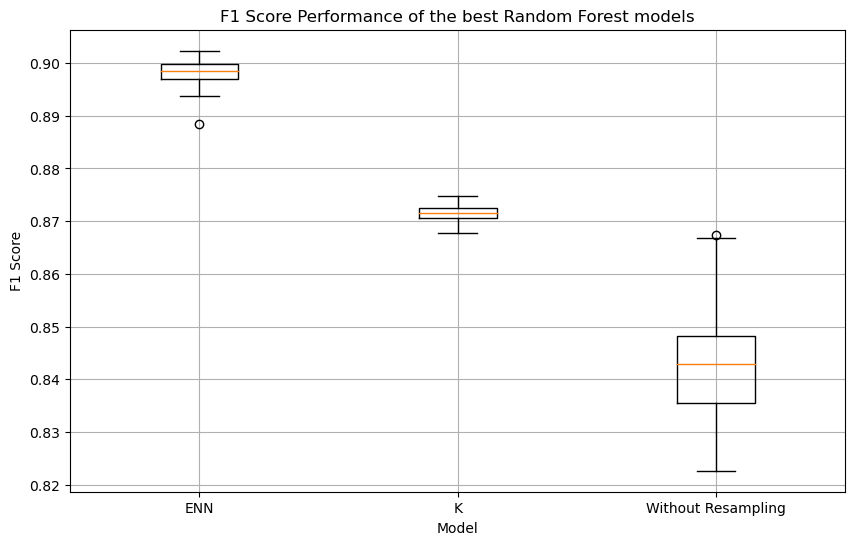

In [69]:
import matplotlib.pyplot as plt
labels = ['ENN', 'K', 'Without Resampling']

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([f1_scores_ENN, f1_scores_K, f1_scores_without_resampling], labels=labels)
plt.title('F1 Score Performance of the best Random Forest models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()


In [ ]:
## The good one!

In [64]:
from scipy import stats
# Perform one-way ANOVA
statistic_good, p_value_good = stats.f_oneway(outer_f1_scores, outer_f1_scores_K, outer_f1_scores_without)

print("One-way ANOVA p-value:", p_value_good)

One-way ANOVA p-value: 2.0567110929843873e-35


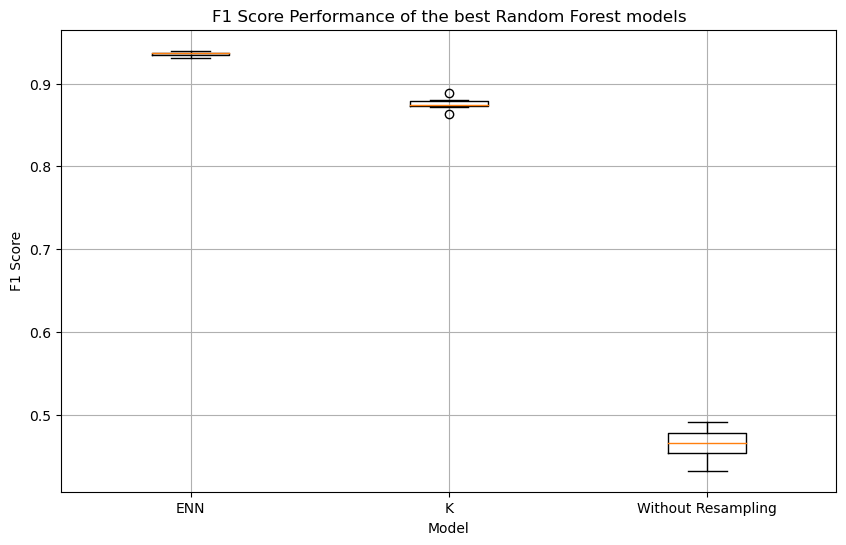

In [72]:
import matplotlib.pyplot as plt
labels = ['ENN', 'K', 'Without Resampling']

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([outer_f1_scores, outer_f1_scores_K, outer_f1_scores_without], labels=labels)
plt.title('F1 Score Performance of the best Random Forest models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

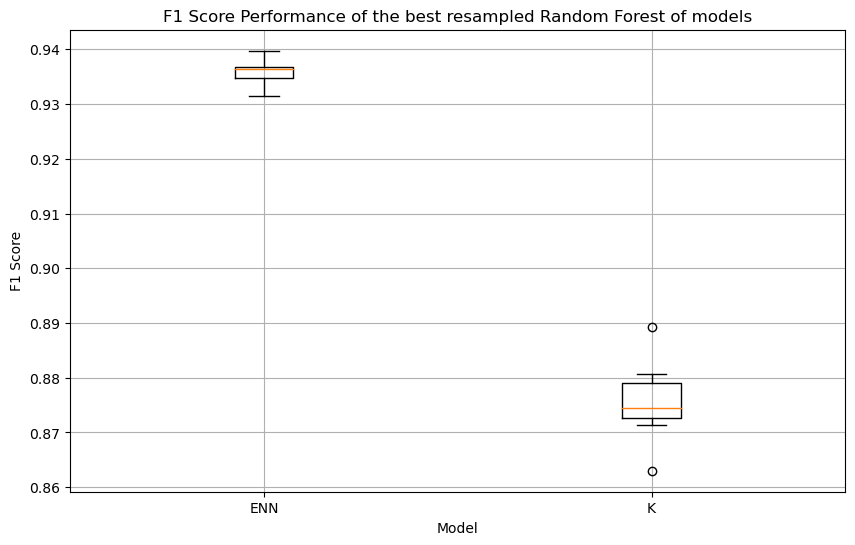

In [71]:
import matplotlib.pyplot as plt
labels = ['ENN', 'K']

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([outer_f1_scores, outer_f1_scores_K], labels=labels)
plt.title('F1 Score Performance of the best resampled Random Forest of models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()